<a href="https://colab.research.google.com/github/aditipriya25/DDOS_attack-_classification/blob/main/ddos_attack_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Step 1: Load the dataset
data = pd.read_csv('/content/02-16-2018.csv')

# Step 2: Handle non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':  # Identify string columns
        try:
            # Attempt to convert strings to floats
            data[column] = data[column].astype(float)
        except ValueError:
            # If conversion fails, use label encoding for categorical columns
            print(f"Non-numeric values detected in column '{column}', applying label encoding.")
            data[column] = data[column].astype('category').cat.codes

# Step 3: Replace inf/-inf with NaN and fill NaN with column mean
data.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 4: Separate features (X) and target (y)
# Assuming the label column is named 'label', replace with the actual column name
X = data.drop(columns=['Label']).values
y = data['Label'].values  # Binary target: 0 for non-DDoS, 1 for DDoS

# Step 5: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Single neuron with sigmoid for binary classification
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Step 10: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 11: Make predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 12: Output results
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


<ipython-input-35-f3dffb50d624>:9: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/02-16-2018.csv')


Non-numeric values detected in column 'Dst Port', applying label encoding.
Non-numeric values detected in column 'Protocol', applying label encoding.
Non-numeric values detected in column 'Timestamp', applying label encoding.
Non-numeric values detected in column 'Flow Duration', applying label encoding.
Non-numeric values detected in column 'Tot Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'Tot Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Max', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Min', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Mean', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Std', applying label encoding.
Non-numeric values detected in column 'Bwd 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.8525 - loss: -3278089.0000 - val_accuracy: 0.8592 - val_loss: -40797692.0000
Epoch 2/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.8529 - loss: -77645608.0000 - val_accuracy: 0.8590 - val_loss: -254032992.0000
Epoch 3/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.8531 - loss: -357224448.0000 - val_accuracy: 0.8590 - val_loss: -769487808.0000
Epoch 4/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.8532 - loss: -965776256.0000 - val_accuracy: 0.8590 - val_loss: -1715139840.0000
Epoch 5/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.8536 - loss: -2033408384.0000 - val_accuracy: 0.8590 - val_loss: -3218763520.0000
Epoch 6/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - accuracy: 0.8526 - loss: -3706040576.0000 - val_accuracy: 0.8590 - val_loss: -5402752000.0000
Epoch 7/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.8534 - loss: -60605936

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     89393
           1       0.76      1.00      0.86     92328
           2       0.00      0.00      0.00     27994

    accuracy                           0.86    209715
   macro avg       0.59      0.66      0.62    209715
weighted avg       0.76      0.86      0.80    209715


Confusion Matrix:
[[88058  1335     0]
 [  187 92141     0]
 [    0 27994     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-36-c0cfe3f2d825>:12: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/02-16-2018.csv')


Non-numeric values detected in column 'Dst Port', applying label encoding.
Non-numeric values detected in column 'Protocol', applying label encoding.
Non-numeric values detected in column 'Timestamp', applying label encoding.
Non-numeric values detected in column 'Flow Duration', applying label encoding.
Non-numeric values detected in column 'Tot Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'Tot Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Max', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Min', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Mean', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Std', applying label encoding.
Non-numeric values detected in column 'Bwd 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.8553 - loss: -2265437.2500 - val_accuracy: 0.8578 - val_loss: -28008486.0000
Epoch 2/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.8543 - loss: -52987156.0000 - val_accuracy: 0.8548 - val_loss: -174813728.0000
Epoch 3/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.8507 - loss: -244719520.0000 - val_accuracy: 0.8538 - val_loss: -528497504.0000
Epoch 4/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.8505 - loss: -662533056.0000 - val_accuracy: 0.8533 - val_loss: -1176866688.0000
Epoch 5/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - accuracy: 0.8510 - loss: -1388445184.0000 - val_accuracy: 0.8535 - val_loss: -2208177408.0000
Epoch 6/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 87s 3ms/step - accuracy: 0.8365 - loss: -2534580992.0000 - val_accuracy: 0.8440 - val_loss: -3702797568.0000
Epoch 7/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - accuracy: 0.7887 - loss: -41677071

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      0.83      0.90     89393
           1       0.68      0.99      0.81     92328
           2       0.00      0.00      0.00     27994

    accuracy                           0.79    209715
   macro avg       0.56      0.61      0.57    209715
weighted avg       0.72      0.79      0.74    209715


Confusion Matrix:
[[74254 15139     0]
 [  496 91832     0]
 [    0 27994     0]]


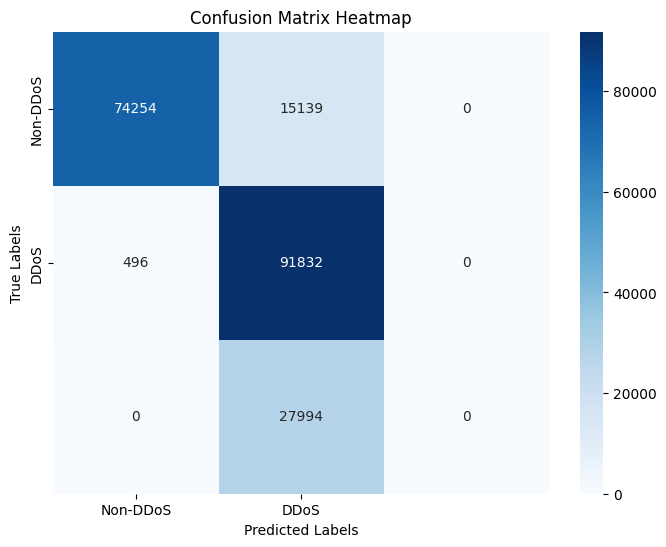

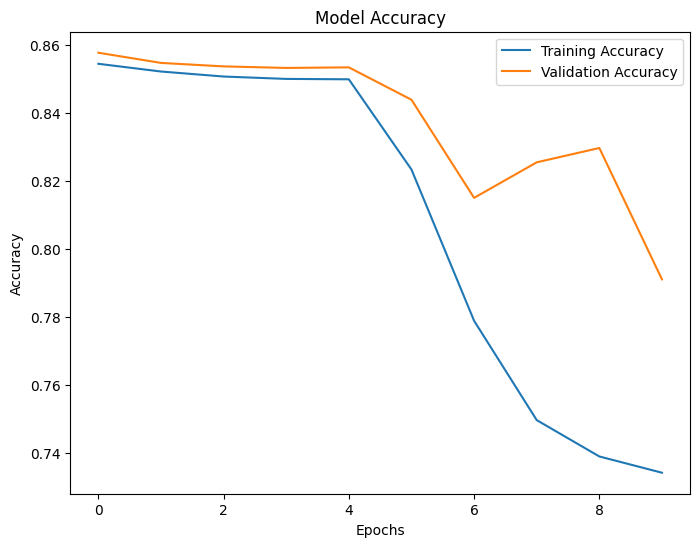

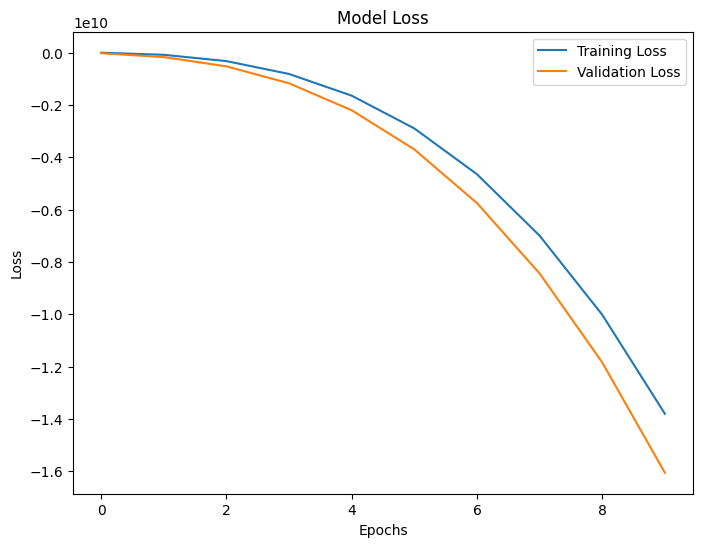

ValueError: multiclass format is not supported

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Step 1: Load the dataset
data = pd.read_csv('/content/02-16-2018.csv')

# Step 2: Handle non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':  # Identify string columns
        try:
            # Attempt to convert strings to floats
            data[column] = data[column].astype(float)
        except ValueError:
            # If conversion fails, use label encoding for categorical columns
            print(f"Non-numeric values detected in column '{column}', applying label encoding.")
            data[column] = data[column].astype('category').cat.codes

# Step 3: Replace inf/-inf with NaN and fill NaN with column mean
data.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 4: Separate features (X) and target (y)
# Assuming the label column is named 'Label', replace with the actual column name
X = data.drop(columns=['Label']).values
y = data['Label'].values  # Binary target: 0 for non-DDoS, 1 for DDoS

# Step 5: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Single neuron with sigmoid for binary classification
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Step 10: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 11: Make predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 12: Output results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Step 13: Visualizations
# 1. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-DDoS", "DDoS"], yticklabels=["Non-DDoS", "DDoS"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 2. Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Step 1: Load the dataset
data = pd.read_csv('/content/02-16-2018.csv')

# Step 2: Handle non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':  # Identify string columns
        try:
            data[column] = data[column].astype(float)
        except ValueError:
            print(f"Non-numeric values detected in column '{column}', applying label encoding.")
            data[column] = data[column].astype('category').cat.codes

# Step 3: Replace inf/-inf with NaN and fill NaN with column mean
data.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 4: Separate features (X) and target (y)
target_column = 'Label'  # Adjust if the target column has a different name
X = data.drop(columns=[target_column]).values
y = data[target_column].values

# Encode target labels (binary classification: 0 for Non-DDoS, 1 for DDoS)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
target_names = label_encoder.classes_

# Step 5: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Add EarlyStopping for better performance
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

# Step 10: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 11: Make predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 12: Output results
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Step 13: Visualizations
# 1. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 2. Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 4. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


<ipython-input-37-b9b38a25165d>:14: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/02-16-2018.csv')


Non-numeric values detected in column 'Dst Port', applying label encoding.
Non-numeric values detected in column 'Protocol', applying label encoding.
Non-numeric values detected in column 'Timestamp', applying label encoding.
Non-numeric values detected in column 'Flow Duration', applying label encoding.
Non-numeric values detected in column 'Tot Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'Tot Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Max', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Min', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Mean', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Std', applying label encoding.
Non-numeric values detected in column 'Bwd 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 0.8383 - loss: -995881088.0000 - val_accuracy: 0.8433 - val_loss: -17504020480.0000
Epoch 2/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8057 - loss: -40286031872.0000 - val_accuracy: 0.7519 - val_loss: -170367680512.0000
Epoch 3/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.7476 - loss: -262180585472.0000 - val_accuracy: 0.4408 - val_loss: -687033483264.0000
Epoch 4/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 87s 5ms/step - accuracy: 0.4408 - loss: -918852927488.0000 - val_accuracy: 0.4408 - val_loss: -1893348540416.0000
Epoch 5/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - accuracy: 0.4548 - loss: -2358046621696.0000 - val_accuracy: 0.8515 - val_loss: -4218426490880.0000
Epoch 6/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.8495 - loss: -5044902035456.0000 - val_accuracy: 0.8515 - val_loss: -8189788028928.0000
Epoch 7/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step -

ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the dataset
data = pd.read_csv('/content/02-16-2018.csv')

# Step 2: Handle non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':  # Identify string columns
        try:
            data[column] = data[column].astype(float)
        except ValueError:
            print(f"Non-numeric values detected in column '{column}', applying label encoding.")
            data[column] = data[column].astype('category').cat.codes

# Step 3: Replace inf/-inf with NaN and fill NaN with column mean
data.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 4: Separate features (X) and target (y)
target_column = 'Label'  # Adjust if the target column has a different name
X = data.drop(columns=[target_column]).values
y = data[target_column].values

# Encode target labels (binary classification: 0 for Non-DDoS, 1 for DDoS)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
target_names = label_encoder.classes_

# Step 5: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Add EarlyStopping for better performance
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

# Step 10: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 11: Make predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 12: Output results
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


<ipython-input-38-26a2e23cce5e>:11: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/02-16-2018.csv')


Non-numeric values detected in column 'Dst Port', applying label encoding.
Non-numeric values detected in column 'Protocol', applying label encoding.
Non-numeric values detected in column 'Timestamp', applying label encoding.
Non-numeric values detected in column 'Flow Duration', applying label encoding.
Non-numeric values detected in column 'Tot Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'Tot Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Max', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Min', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Mean', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Std', applying label encoding.
Non-numeric values detected in column 'Bwd 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 86s 7ms/step - accuracy: 0.7938 - loss: -581.1714 - val_accuracy: 0.8648 - val_loss: -4242.5825
Epoch 2/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - accuracy: 0.8079 - loss: -6265.5386 - val_accuracy: 0.8652 - val_loss: -14060.8467
Epoch 3/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.8092 - loss: -17505.0625 - val_accuracy: 0.8652 - val_loss: -30453.3184
Epoch 4/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 86s 7ms/step - accuracy: 0.8091 - loss: -34141.3828 - val_accuracy: 0.8653 - val_loss: -49918.6680
Epoch 5/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - accuracy: 0.8098 - loss: -56114.3359 - val_accuracy: 0.8653 - val_loss: -77824.2969
Epoch 6/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.8082 - loss: -83622.5781 - val_accuracy: 0.8652 - val_loss: -109338.1172
Epoch 7/50
10486/10486 ━━━━━━━━━━━━━━━━━━━━ 70s 7ms/step - accuracy: 0.8089 - loss: -116346.0156 - val_accuracy: 0.8646 - val_loss: -147356.2344


ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

<ipython-input-41-81e436e0964d>:12: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/02-16-2018.csv')


Non-numeric values detected in column 'Dst Port', applying label encoding.
Non-numeric values detected in column 'Protocol', applying label encoding.
Non-numeric values detected in column 'Timestamp', applying label encoding.
Non-numeric values detected in column 'Flow Duration', applying label encoding.
Non-numeric values detected in column 'Tot Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'Tot Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Fwd Pkts', applying label encoding.
Non-numeric values detected in column 'TotLen Bwd Pkts', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Max', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Min', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Mean', applying label encoding.
Non-numeric values detected in column 'Fwd Pkt Len Std', applying label encoding.
Non-numeric values detected in column 'Bwd 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.8523 - loss: -2829692.7500 - val_accuracy: 0.8603 - val_loss: -36176972.0000
Epoch 2/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.8526 - loss: -70293360.0000 - val_accuracy: 0.8596 - val_loss: -234036656.0000
Epoch 3/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.8529 - loss: -329145280.0000 - val_accuracy: 0.8597 - val_loss: -719253312.0000
Epoch 4/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.8531 - loss: -901163264.0000 - val_accuracy: 0.8594 - val_loss: -1615884544.0000
Epoch 5/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.8521 - loss: -1926097152.0000 - val_accuracy: 0.8595 - val_loss: -3043436544.0000
Epoch 6/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - accuracy: 0.8529 - loss: -3489735936.0000 - val_accuracy: 0.8593 - val_loss: -5125942784.0000
Epoch 7/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.8524 - loss: -57478758

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     89393
           1       0.76      0.99      0.86     92328
           2       0.00      0.00      0.00     27994

    accuracy                           0.86    209715
   macro avg       0.58      0.66      0.62    209715
weighted avg       0.76      0.86      0.80    209715


Confusion Matrix:
[[88384  1009     0]
 [  529 91799     0]
 [    0 27994     0]]


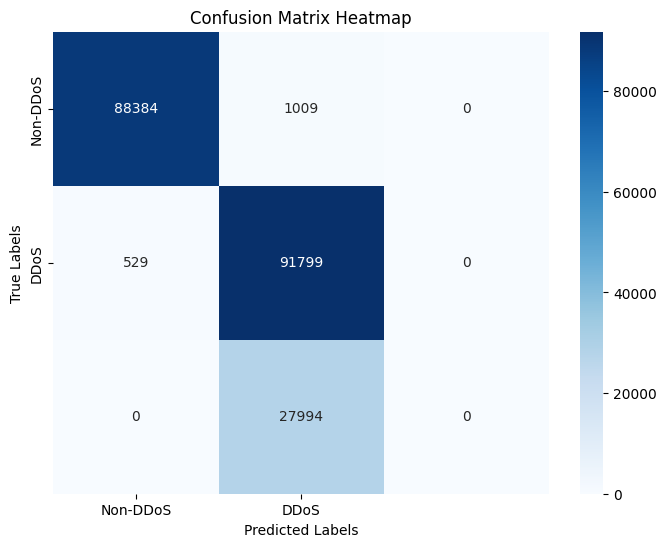

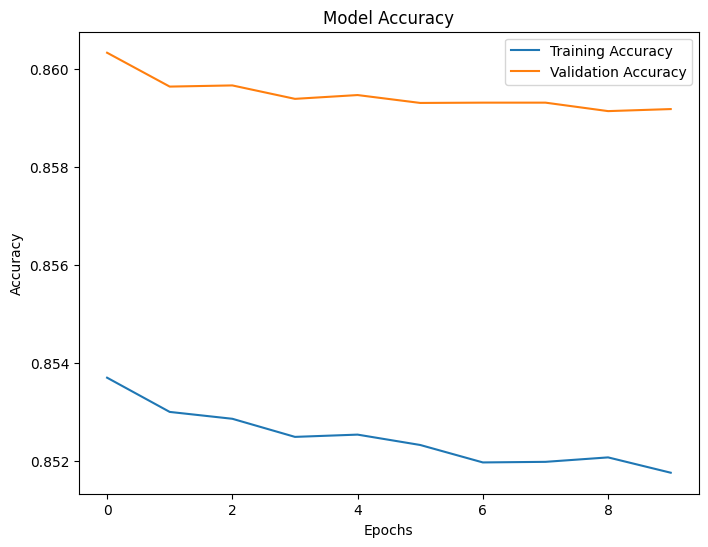

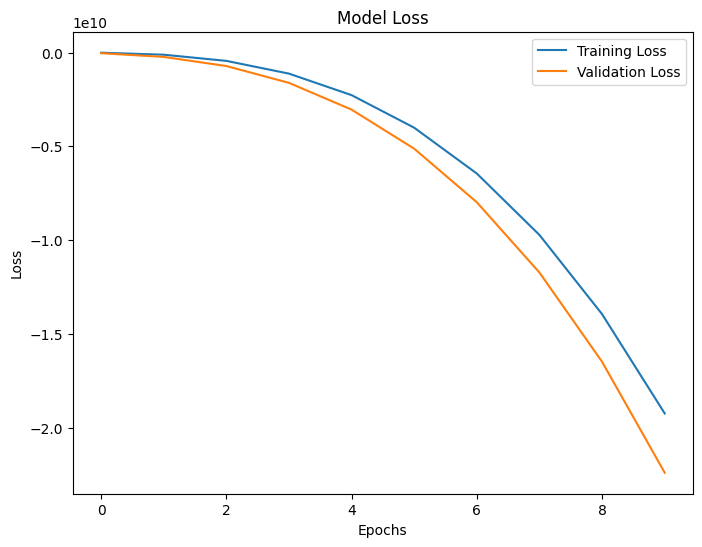

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Step 1: Load the dataset
data = pd.read_csv('/content/02-16-2018.csv')

# Step 2: Handle non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':  # Identify string columns
        try:
            # Attempt to convert strings to floats
            data[column] = data[column].astype(float)
        except ValueError:
            # If conversion fails, use label encoding for categorical columns
            print(f"Non-numeric values detected in column '{column}', applying label encoding.")
            data[column] = data[column].astype('category').cat.codes

# Step 3: Replace inf/-inf with NaN and fill NaN with column mean
data.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 4: Separate features (X) and target (y)
# Assuming the label column is named 'Label', replace with the actual column name
X = data.drop(columns=['Label']).values
y = data['Label'].values  # Binary target: 0 for non-DDoS, 1 for DDoS

# Step 5: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Single neuron with sigmoid for binary classification
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Step 10: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 11: Make predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 12: Output results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Step 13: Visualizations
# 1. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-DDoS", "DDoS"], yticklabels=["Non-DDoS", "DDoS"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 2. Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Non-numeric values detected in column 'Timestamp', applying label encoding.
Non-numeric values detected in column 'Label', applying label encoding.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.7499 - loss: -692660.2500 - val_accuracy: 0.7635 - val_loss: -8845746.0000
Epoch 2/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.7459 - loss: -16595199.0000 - val_accuracy: 0.7631 - val_loss: -55103376.0000
Epoch 3/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 98s 4ms/step - accuracy: 0.7455 - loss: -75580856.0000 - val_accuracy: 0.7627 - val_loss: -167225616.0000
Epoch 4/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 135s 4ms/step - accuracy: 0.7432 - loss: -207707840.0000 - val_accuracy: 0.7641 - val_loss: -372006688.0000
Epoch 5/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.7457 - loss: -433684736.0000 - val_accuracy: 0.7633 - val_loss: -698818496.0000
Epoch 6/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.7435 - loss: -791806912.0000 - val_accuracy: 0.7643 - val_loss: -1169054976.0000
Epoch 7/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.7451 - loss: -1285364736.0000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95    133397
           1       0.44      1.00      0.61     38689
           2       0.00      0.00      0.00     37629

    accuracy                           0.76    209715
   macro avg       0.48      0.64      0.52    209715
weighted avg       0.72      0.76      0.72    209715


Confusion Matrix:
[[121367  12030      0]
 [     0  38689      0]
 [     0  37629      0]]


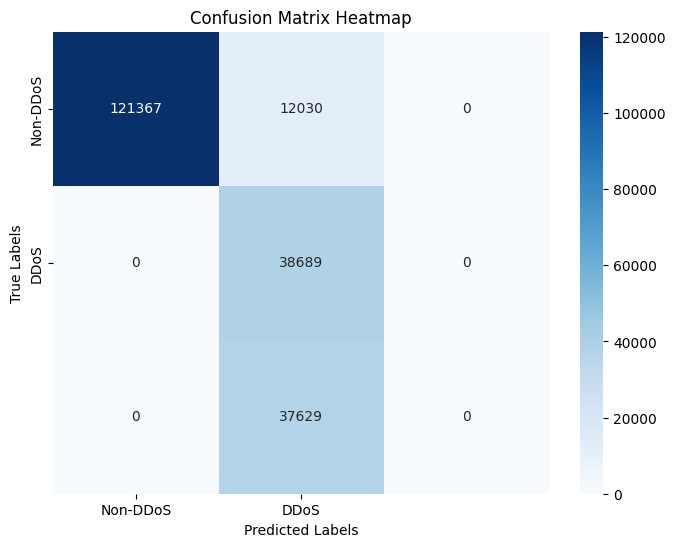

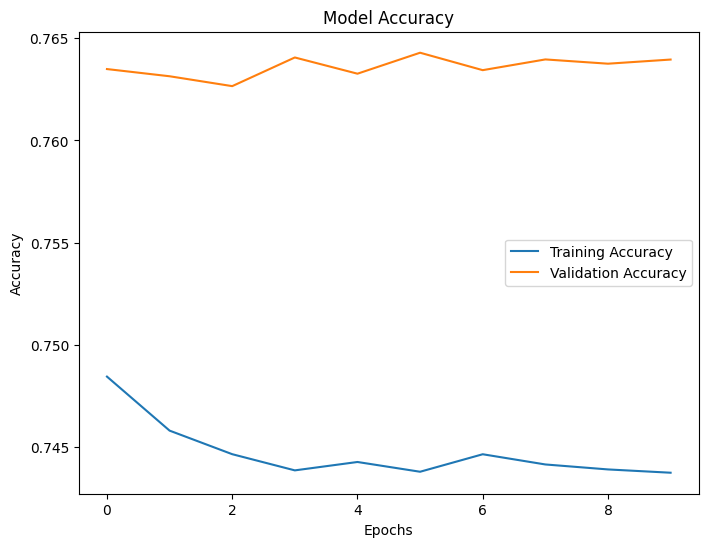

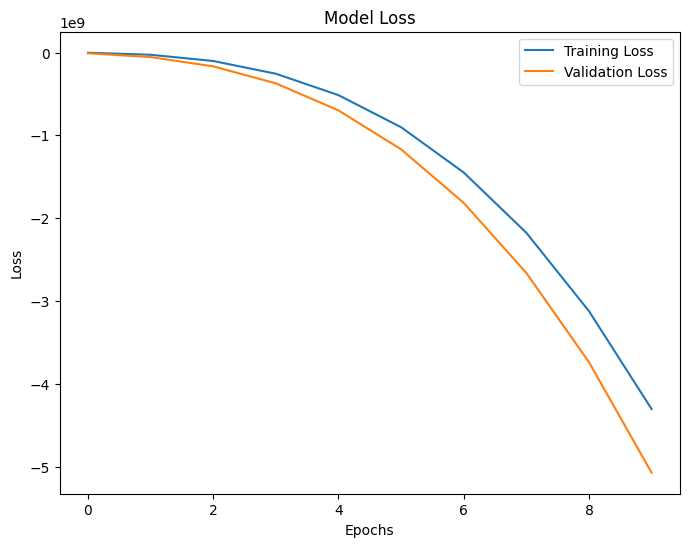

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Step 1: Load the dataset
data = pd.read_csv('/content/02-14-2018.csv')

# Step 2: Handle non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':  # Identify string columns
        try:
            # Attempt to convert strings to floats
            data[column] = data[column].astype(float)
        except ValueError:
            # If conversion fails, use label encoding for categorical columns
            print(f"Non-numeric values detected in column '{column}', applying label encoding.")
            data[column] = data[column].astype('category').cat.codes

# Step 3: Replace inf/-inf with NaN and fill NaN with column mean
data.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 4: Separate features (X) and target (y)
# Assuming the label column is named 'Label', replace with the actual column name
X = data.drop(columns=['Label']).values
y = data['Label'].values  # Binary target: 0 for non-DDoS, 1 for DDoS

# Step 5: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Single neuron with sigmoid for binary classification
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Step 10: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 11: Make predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 12: Output results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Step 13: Visualizations
# 1. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-DDoS", "DDoS"], yticklabels=["Non-DDoS", "DDoS"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 2. Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Non-numeric values detected in column 'Timestamp', applying label encoding.
Non-numeric values detected in column 'Label', applying label encoding.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - accuracy: 0.9742 - loss: -1582.6395 - val_accuracy: 0.9817 - val_loss: -19484.1992
Epoch 2/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - accuracy: 0.9766 - loss: -39999.4297 - val_accuracy: 0.9810 - val_loss: -129124.8516
Epoch 3/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - accuracy: 0.9767 - loss: -189263.3281 - val_accuracy: 0.9817 - val_loss: -400470.9375
Epoch 4/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 87s 3ms/step - accuracy: 0.9769 - loss: -518965.9688 - val_accuracy: 0.9812 - val_loss: -899389.9375
Epoch 5/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9767 - loss: -1155357.5000 - val_accuracy: 0.9818 - val_loss: -1691245.1250
Epoch 6/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - accuracy: 0.9771 - loss: -1984192.6250 - val_accuracy: 0.9815 - val_loss: -2860227.0000
Epoch 7/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/step - accuracy: 0.9768 - loss: -3403670.2500 - val_accuracy: 0.9814 - val_los

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    199171
           1       0.68      1.00      0.81      8330
           2       0.00      0.00      0.00      2214

    accuracy                           0.98    209715
   macro avg       0.56      0.66      0.60    209715
weighted avg       0.98      0.98      0.98    209715


Confusion Matrix:
[[197473   1698      0]
 [    25   8305      0]
 [     1   2213      0]]


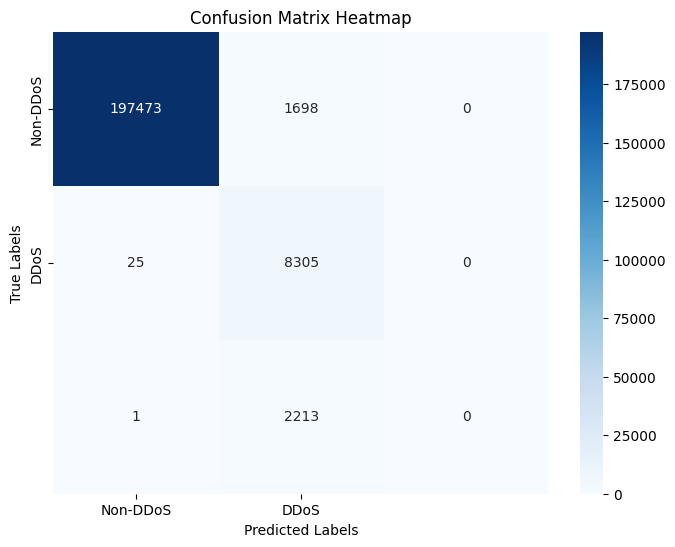

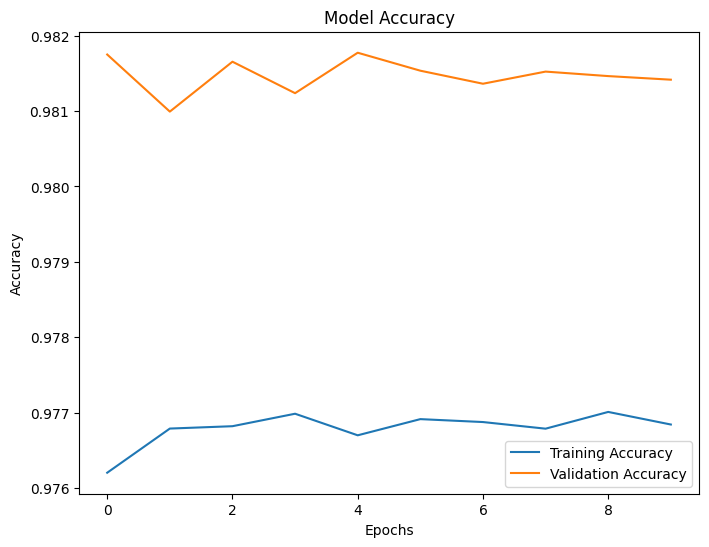

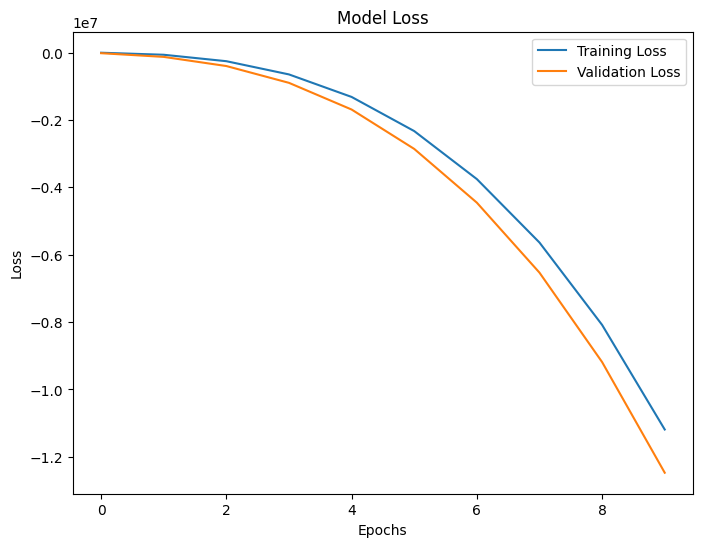

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Step 1: Load the dataset
data = pd.read_csv('/content/02-15-2018.csv')

# Step 2: Handle non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':  # Identify string columns
        try:
            # Attempt to convert strings to floats
            data[column] = data[column].astype(float)
        except ValueError:
            # If conversion fails, use label encoding for categorical columns
            print(f"Non-numeric values detected in column '{column}', applying label encoding.")
            data[column] = data[column].astype('category').cat.codes

# Step 3: Replace inf/-inf with NaN and fill NaN with column mean
data.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 4: Separate features (X) and target (y)
# Assuming the label column is named 'Label', replace with the actual column name
X = data.drop(columns=['Label']).values
y = data['Label'].values  # Binary target: 0 for non-DDoS, 1 for DDoS

# Step 5: Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Single neuron with sigmoid for binary classification
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Step 10: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 11: Make predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 12: Output results
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Step 13: Visualizations
# 1. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-DDoS", "DDoS"], yticklabels=["Non-DDoS", "DDoS"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 2. Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
t